#
# Partie Analyse exploratoire

In [154]:

# Import des librairies utilisées

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import category_encoders as ce
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
import shap




In [5]:

# Lecture des données

df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

##
## Features Engineering

In [7]:

# Filtrage des bâtiments résidentiels

df1 = df[(df['BuildingType']=='NonResidential')|(df['BuildingType']=='Nonresidential COS')|(df['BuildingType']=='Nonresidential WA')]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [9]:

# Fonction pour calculer l'âge des bâtiments

def years_build(year_b):
    year_b = str(year_b)
    year_b = datetime.strptime(year_b, "%Y").date()
    today= date.today()
    return today.year - year_b.year

df1['How_old_Building_is'] = df1['YearBuilt'].apply(years_build)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,95
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,26
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,53
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,96
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,18
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,48
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57,33


In [11]:
df2 = df1

In [12]:

# Création d'une colonne pour savoir si le bâtiment utilise du gaz

df2['Gas_used'] = df2['NaturalGas(kBtu)']!= 0.0
df2['Gas_used'] = df2['Gas_used'].astype(int)
df2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,95,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,26,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,53,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,96,1
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,18,1
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,48,1
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57,33,1


In [13]:

# Création d'une colonne pour savoir si le bâtiment utilise de l'électricité

df2['Electricity_used'] = df2['Electricity(kBtu)']!= 0.0
df2['Electricity_used'] = df2['Electricity_used'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,95,1,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,26,1,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,53,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,96,1,1
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,42,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,18,1,1
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,48,1,1
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57,33,1,1


In [14]:

# Création d'une colonne pour savoir si le bâtiment utilise de l'électricité

df2['Steam_used'] = df2['SteamUse(kBtu)']!= 0.0
df2['Steam_used'] = df2['Steam_used'].astype(int)
df2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,False,NaN,Compliant,NaN,249.98,2.83,95,1,1,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,False,NaN,Compliant,NaN,295.86,2.86,26,1,1,0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,False,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,False,NaN,Compliant,NaN,286.43,4.67,96,1,1,1
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,False,NaN,Compliant,NaN,505.01,2.88,42,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,False,NaN,Compliant,NaN,32.17,2.01,18,1,1,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,False,NaN,Compliant,NaN,223.54,16.99,48,1,1,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,False,NaN,Compliant,NaN,22.11,1.57,33,1,1,0


In [15]:

# Création d'une colonne pour savoir si un bâtiment a un parking

df2['Parking_used'] = df2['PropertyGFAParking']!= 0.0
df2['Parking_used'] = df2['Parking_used'].astype(int)
df2


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [16]:

# Information sur les outliers

df2['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [17]:

# Filtrage des outliers

df2 = df2[(df2['Outlier']!='High outlier')]
df2 = df2[(df2['Outlier']!='Low outlier')]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [20]:

# Filtrage des valeurs nulles et négatives

df3 = df2.loc[-(df2['TotalGHGEmissions']<=0)]
df3

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [21]:

# Filtrage des NaN pour 'TotalGHGEmissions'

df4 = df3.loc[-(df3['TotalGHGEmissions'].isna())]
df4

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


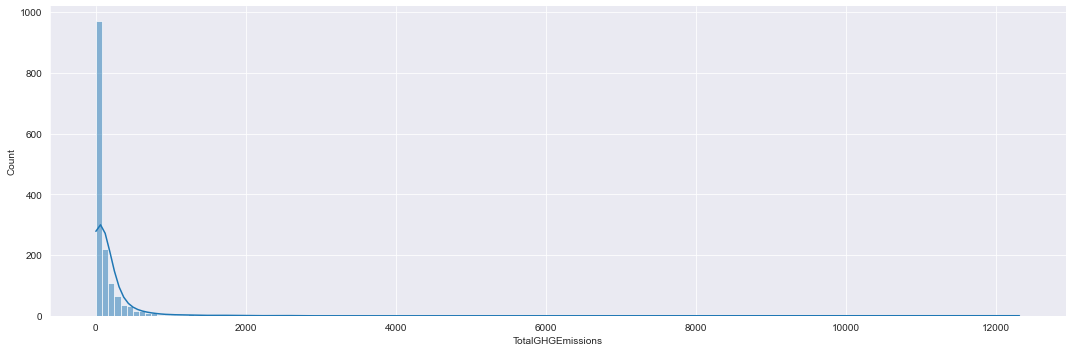

In [23]:

# Affichage de la distribution de la variable 'TotalGHGEmissions'

sns.displot(data = df4, x = 'TotalGHGEmissions', kde = True, aspect = 3, bins=150)

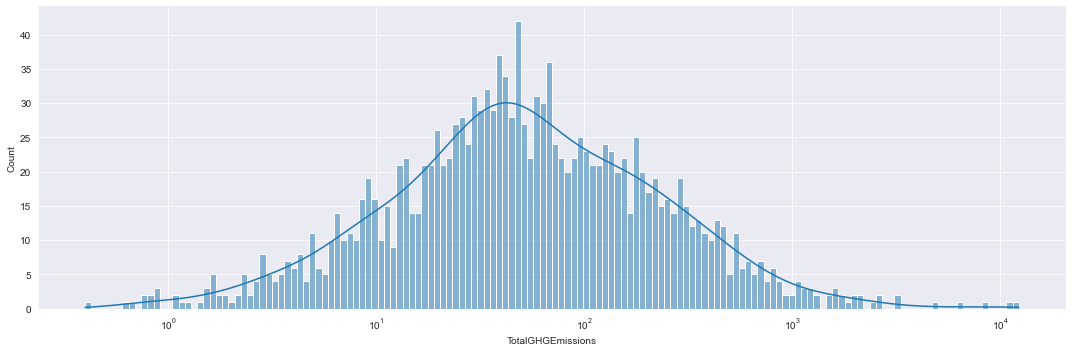

In [24]:

# Affichage de la distribution de la variable 'TotalGHGEmissions' avec échelle logarithmique

sns.displot(data = df4, x = 'TotalGHGEmissions', kde = True, aspect = 3, bins=150, log_scale=True)

In [25]:

# Information sur la variable 'SiteEnergyUseWN(kBtu)'

df4["SiteEnergyUseWN(kBtu)"].describe()

count    1.523000e+03
mean     7.789137e+06
std      1.890064e+07
min      0.000000e+00
25%      1.292564e+06
50%      2.762806e+06
75%      7.227405e+06
max      2.966717e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [26]:

# Filtrage des valeurs nulles ou négative pour la variable 'SiteEnergyUseWN(kBtu)'

df5 = df4.loc[-(df3['SiteEnergyUseWN(kBtu)'] <= 0.0)]
df5

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [27]:

# Filtrage des NaN pour la variable 'SiteEnergyUseWN(kBtu)'

df6 = df5.loc[-(df3['SiteEnergyUseWN(kBtu)'].isna())]
df6

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


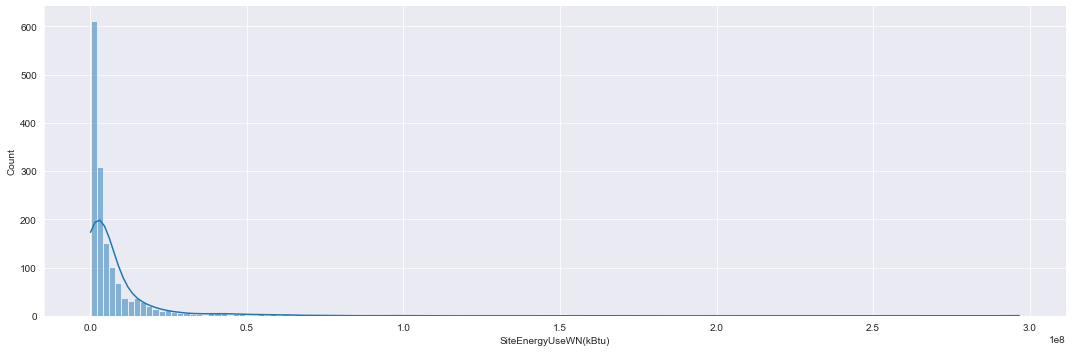

In [29]:

# Affichage de la distribution de la variable 'SiteEnergyUseWN(kBtu)'

sns.displot(data = df6, x = 'SiteEnergyUseWN(kBtu)', kde = True, aspect = 3, bins = 150)

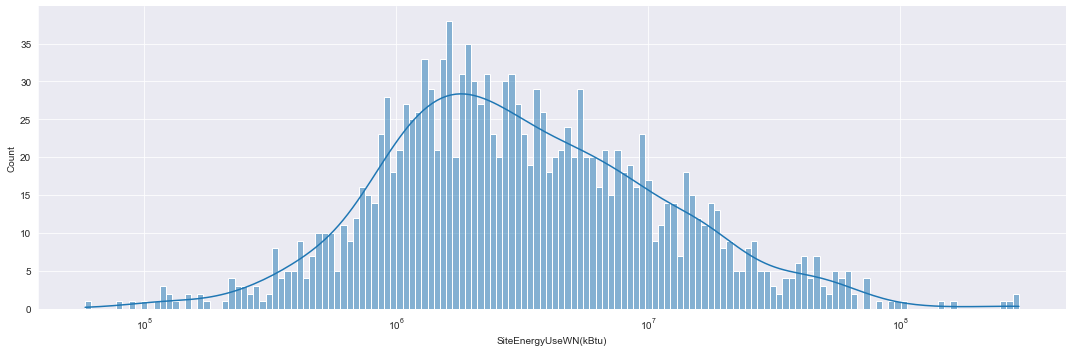

In [30]:

# Affichage de la distribution de la variable 'SiteEnergyUseWN(kBtu)' avec une échelle logarithmique

sns.displot(data = df6, x = 'SiteEnergyUseWN(kBtu)', kde = True, aspect = 3, bins = 150, log_scale = True)

In [31]:

# Sélection des features pertinentes pour notre étude

df7 = df6[['PrimaryPropertyType','Neighborhood', 'PropertyGFATotal', 'Parking_used', 'NumberofBuildings', 'NumberofFloors', 'How_old_Building_is', 'Electricity_used', 'Gas_used', 'Steam_used','SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]
df7

,PrimaryPropertyType,Neighborhood,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,Hotel,DOWNTOWN,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98
1,Hotel,DOWNTOWN,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86
2,Hotel,DOWNTOWN,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28
3,Hotel,DOWNTOWN,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43
4,Hotel,DOWNTOWN,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Office,GREATER DUWAMISH,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94
3372,Other,DOWNTOWN,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17
3373,Other,MAGNOLIA / QUEEN ANNE,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54
3374,Mixed Use Property,GREATER DUWAMISH,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11


##
### One-Hot encoding

In [33]:

# Préparation des données pour le One-Hot encoding, sélection des variables catégorielles

categorial_df7 = df7.select_dtypes(include = 'object')
categorial_df7

,PrimaryPropertyType,Neighborhood
0,Hotel,DOWNTOWN
1,Hotel,DOWNTOWN
2,Hotel,DOWNTOWN
3,Hotel,DOWNTOWN
4,Hotel,DOWNTOWN
...,...,...
3371,Office,GREATER DUWAMISH
3372,Other,DOWNTOWN
3373,Other,MAGNOLIA / QUEEN ANNE
3374,Mixed Use Property,GREATER DUWAMISH


In [34]:

# Préparation des données pour le One-Hot encoding, sélection des variables numériques

numerical_df7 = df7.select_dtypes(include = ('int32', 'int64', 'float64'))
numerical_df7

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98
1,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86
2,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28
3,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43
4,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94
3372,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17
3373,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54
3374,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11


In [35]:

# Création des variables dummies (pour les variables catégorielles)

categorial_df7_dummies = pd.get_dummies(categorial_df7)
categorial_df7_dummies

,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:

# Concaténation de toutes les variables

df7_v1 = pd.concat([numerical_df7, categorial_df7_dummies], axis = 1)
df7_v1

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11,...,1,0,0,0,0,0,0,0,0,0


In [37]:

# Passage au log pour les variables 'SiteEnergyUseWN(kBtu)' et 'TotalGHGEmissions'

df7_v1['SiteEnergyUseWN(kBtu)'] = np.log(df7_v1['SiteEnergyUseWN(kBtu)'])
df7_v1['TotalGHGEmissions'] = np.log(df7_v1['TotalGHGEmissions'])

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,15.824652,5.521381,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,15.974742,5.689886,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,18.118725,7.644575,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,15.753792,5.657494,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,16.500395,6.224578,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,13.756825,3.041661,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,13.867824,3.471034,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,15.616191,5.409590,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,13.570685,3.096030,...,1,0,0,0,0,0,0,0,0,0


In [39]:
df8 = df7_v1
df8

In [41]:
# On crée X et y dans le but de séparer les données d'entraînements et les données de tests

y = df8['SiteEnergyUseWN(kBtu)']
X = df8.drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],axis = 1)



In [42]:
X

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
